In [1]:
import os
import sys
import numpy as np
from pathlib import Path

# Add the path to the custom library to the system path
sys.path.append(str(Path().resolve().parent))

# Import the module from the custom library
from src import Tensor, metrics
from src.core.utils import data_analysis, context_manager
from src.architectures.sequential import Sequential

### Constants


In [2]:
# Define constants
model_path = os.path.join(os.getcwd(), 'checkpoints', 'sine_approximator')
n_points = 400

### Load the model


In [3]:
# Load the trained model
model: Sequential = Sequential.load(model_path)

# Set the model to evaluation mode
model.eval()

### Inference


In [6]:
# Build a clean sine signal for evaluation
x_np = np.linspace(0, 2 * np.pi, n_points, dtype=np.float32).reshape(-1, 1)
y_true_np = np.sin(x_np).astype(np.float32)

# Convert to tensors
X = Tensor(x_np)
y_true = Tensor(y_true_np)

# Set the context manager to no_grad to disable gradient tracking during inference
with context_manager.no_grad():
    # Compute predictions
    predictions = model(x=X)

# Compute MAE against the clean sine curve
mae = metrics.mean_absolute_error(y_true, predictions.output)
print(f'Mean Absolute Error: {mae.data:.6f}')

Mean Absolute Error: 0.025763


### Display predictions


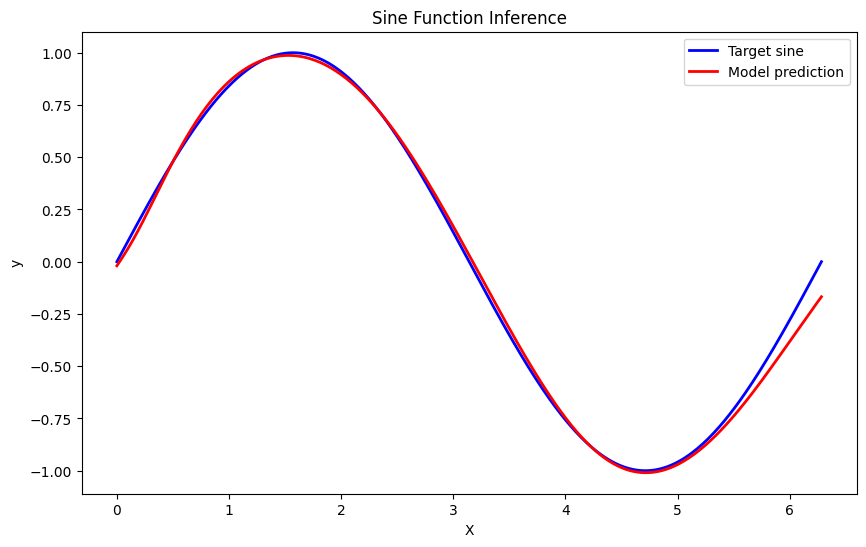

In [5]:
# Plot target sine curve and model predictions
data_analysis.plot_data(
    datasets=[
        {'points': np.array(list(zip(X.data.squeeze(), y_true.data.squeeze()))), 'label': 'Target sine', 'color': 'blue', 'plot_type': 'line'},
        {'points': np.array(list(zip(X.data.squeeze(), predictions.output.data.squeeze()))), 'label': 'Model prediction', 'color': 'red', 'plot_type': 'line'},
    ],
    title='Sine Function Inference',
    xlabel='X',
    ylabel='y'
)